In [84]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import xgboost as xgb
import warnings
# ignore warnings
warnings.filterwarnings("ignore")

In [85]:
# Import the data
data = pd.read_csv('column_2C_weka.csv')
# display(data)

In [86]:
# High level description of the data involved
data.describe(include='all')

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal
freq,NaN,NaN,NaN,NaN,NaN,NaN,210
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


In [87]:
data.info()
data['class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


Abnormal    210
Normal      100
Name: class, dtype: int64

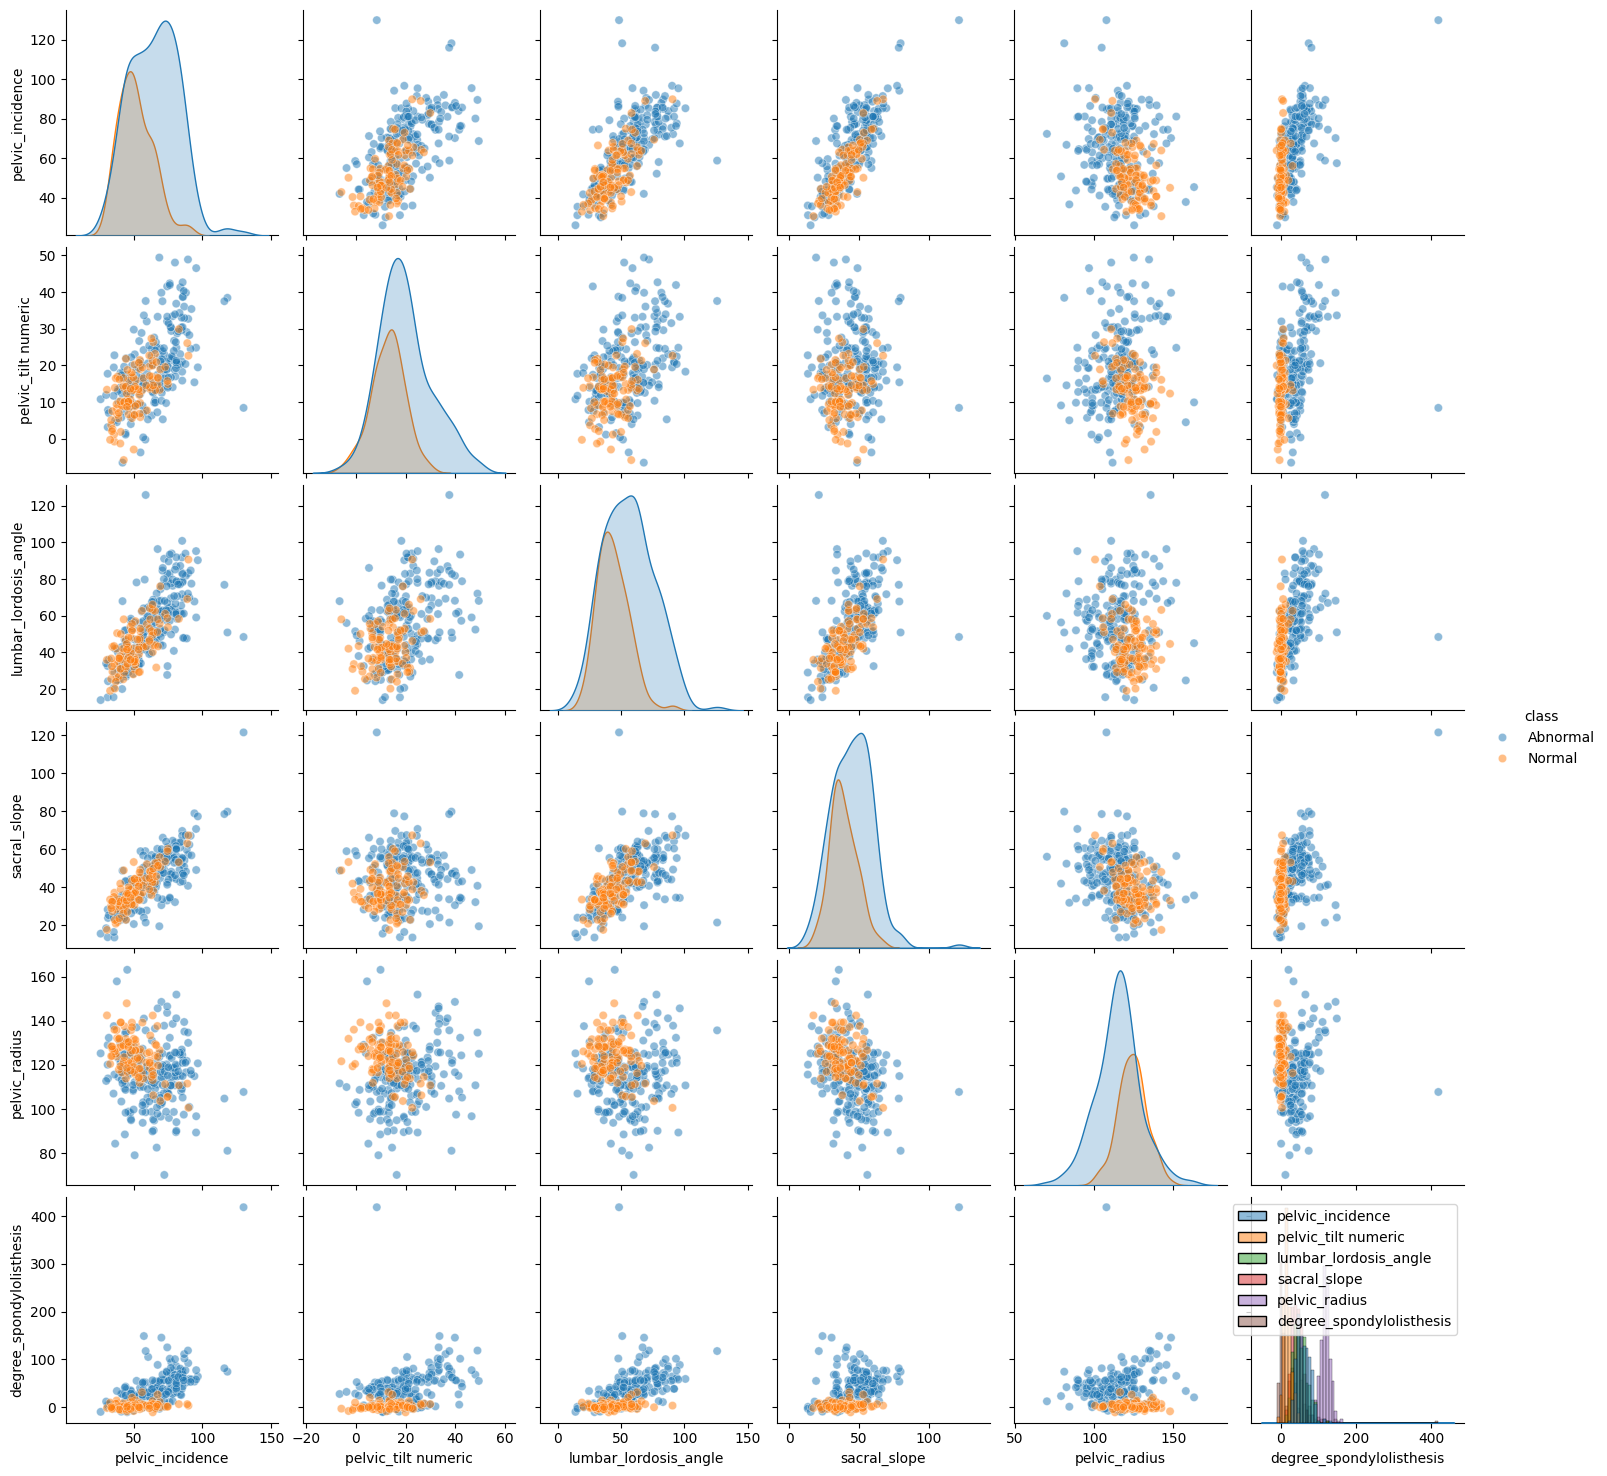

In [88]:
# Visualize relationships among the dependent variables for EDA
sns.pairplot(data, hue="class", plot_kws={"alpha": 0.5})
sns.histplot(data)
plt.show()

In [89]:
# Initialize Label Encoder
le = LabelEncoder()

# Numerically encode the categorical variables
le.fit(data["class"])
data["class"] = le.transform(data["class"])

# Split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['class']), data['class'], test_size=.2, random_state=42)

In [90]:
# # Log Transformation of the highly skewed features
# x_train['degree_spondylolisthesis'] = np.log1p(x_train['degree_spondylolisthesis'])
# x_test['degree_spondylolisthesis'] = np.log1p(x_test['degree_spondylolisthesis'])

# # Note: KNNImputer can be computationally expensive for large datasets
# imputer = KNNImputer(n_neighbors=9)
# imputer.fit(x_train)

# # Fit on training set to prohibit data leakage
# x_train_imputed = imputer.transform(x_train)
# x_test_imputed = imputer.transform(x_test)


# # Reconstruct DataFrame with imputed values
# x_train = pd.DataFrame(x_train_imputed, columns=x_train.columns)
# x_test = pd.DataFrame(x_test_imputed, columns=x_test.columns)

# # Standardize data, Models performed better with STANDARDIZED data
# scaler = StandardScaler()
# # scaler = MinMaxScaler()

# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

# # Convert the scaled arrays back to DataFrame (if needed)
# x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)
# x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

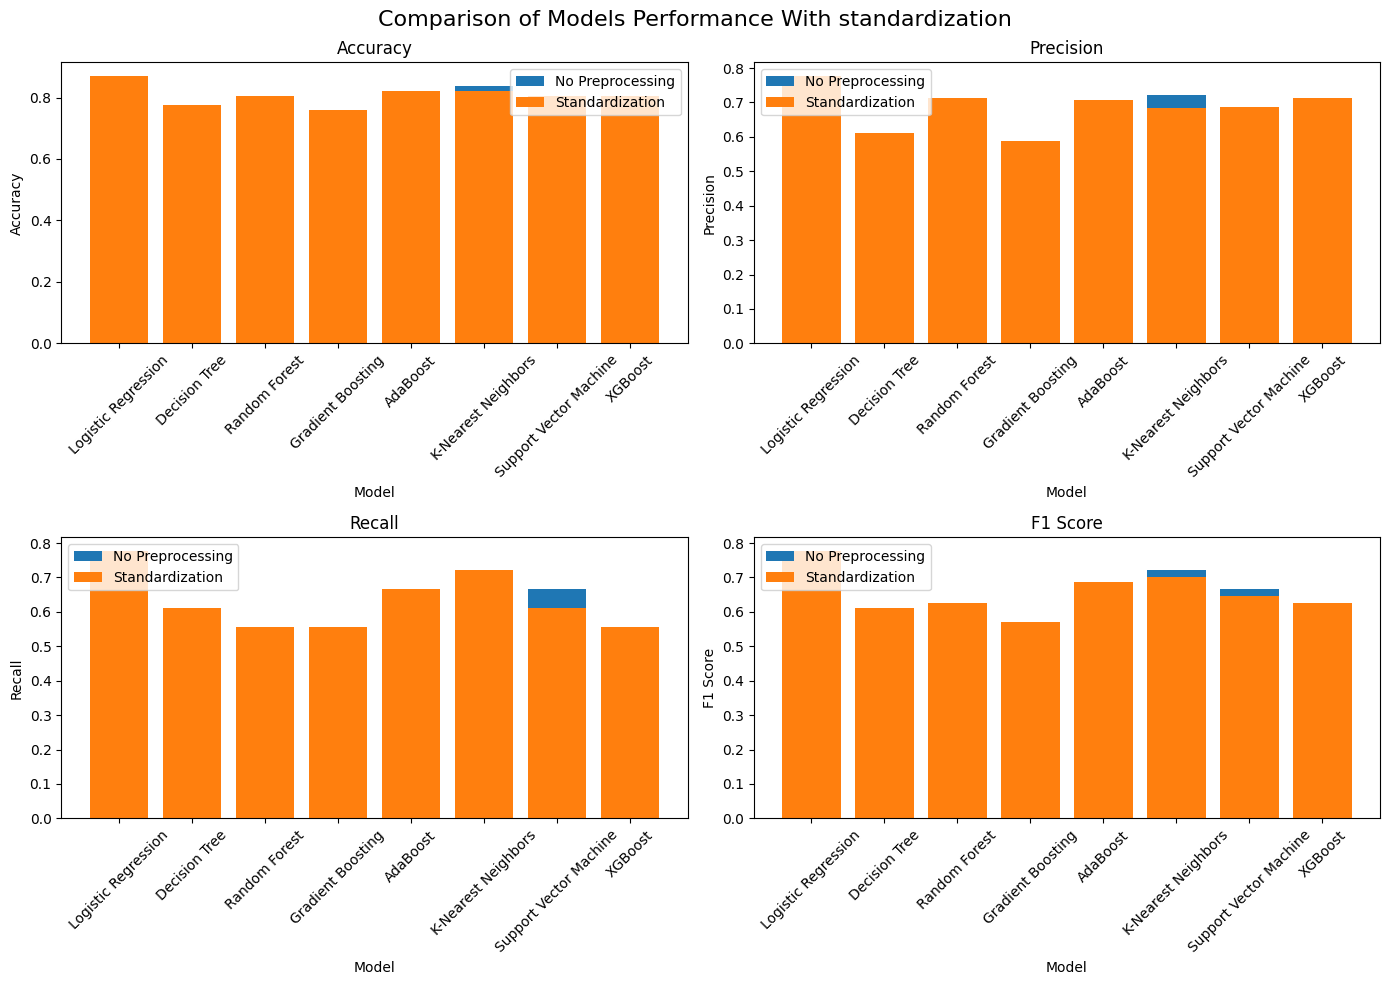

In [91]:
# Define preprocessing techniques
preprocessing_techniques = {
    'No Preprocessing': None,
    'Standardization': StandardScaler()
}

# Define models
models = { 
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': xgb.XGBClassifier()
}

# Store metrics for each model and preprocessing technique
metrics_data = {'Model': [], 'Preprocessing Technique': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Iterate over each model
for model_name, model in models.items():
    # Iterate over each preprocessing technique
    for preprocessing_name, preprocessing_method in preprocessing_techniques.items():
        if preprocessing_method is None:
            x_train_preprocessed, x_test_preprocessed = x_train, x_test
        else:
            # Apply preprocessing
            scaler = preprocessing_method
            x_train_preprocessed = scaler.fit_transform(x_train)
            x_test_preprocessed = scaler.transform(x_test)
        
        # Train the model
        model.fit(x_train_preprocessed, y_train)
        
        # Make predictions 
        y_pred = model.predict(x_test_preprocessed)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Store metrics
        metrics_data['Model'].append(model_name)
        metrics_data['Preprocessing Technique'].append(preprocessing_name)
        metrics_data['Accuracy'].append(accuracy)
        metrics_data['Precision'].append(precision)
        metrics_data['Recall'].append(recall)
        metrics_data['F1 Score'].append(f1)

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_data)
# display(metrics_df)


plt.figure(figsize=(14, 10))


# Plot each metric by preprocessing technique
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    grouped = metrics_df.groupby('Preprocessing Technique')

    for name, group in grouped:
        plt.bar(group['Model'], group[metric], label=name)
    
    # Add labels and title
    plt.title(metric)
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend()

plt.suptitle('Comparison of Models Performance With standardization', fontsize=16)
plt.tight_layout()
plt.show()


The following is a summary comparing the model performance across different preprocessing techniques, standardization or feature transformations. The log transformation of the `degree_spondylolisthesis` feature requires imputation since the log transformation produce null values. KNN imputation was the preferred method of inputation, as it exhibited higher performance across models in comparison of imputing null values with the median/mean/mode.

1. **Logistic Regression**:
   - With standardization only, there's an improvement in accuracy, precision, and F1 score compared to no preprocessing.
   - Further preprocessing leads to a slight decrease in accuracy, precision, and F1 score.
   - **Despite the slight decrease in performance with additional preprocessing, Logistic Regression consistently was one of the top performers across all preprocessing techniques.**

2. **K-Nearest Neighbors**:
   - KNN performs significantly better in accuracy, precision, recall, specificity, and F1 score with the when compared to both no preprocessing and standardization only.

3. **Decision Tree**:
   - With additional preprocessing steps, there's an increase in accuracy, precision, recall, specificity, and F1 score compared to both no preprocessing and standardization only.

4. **Random Forest**:
   - Results remain relatively consistent across different preprocessing techniques, with no significant improvements/deteriorations observed.

5. **Gradient Boosting, AdaBoost, Support Vector Machine, and XGBoost**:
   - Models exhibit similar trends, with minor fluctuations in performance across different preprocessing techniques.
   - In some cases, additional preprocessing leads to slight improvements in certain metrics like precision and recall, but not consistently across all models
   - Consistently underperforms to Logistic Regression and KNN


The highest accuracy is when K=3.


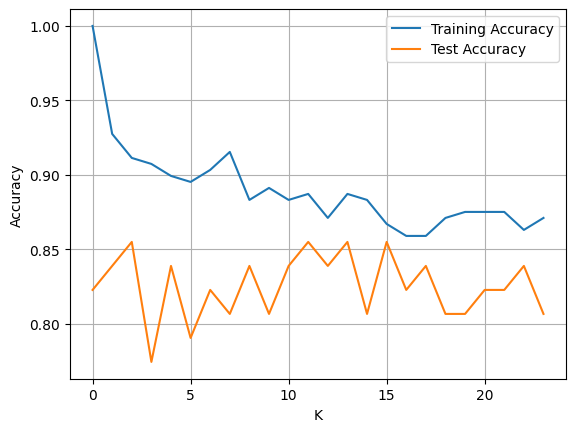

In [92]:
# Initialize empty lists to store training and test accuracies
training_Accuracy = []
test_Accuracy = []
k_values = range(1, 25) 
best_k = 0  
max_test_accuracy = 0  

# Iterate over each value of k
for i in k_values:
    # Create a KNN classifier model with k=i neighbors
    model = KNeighborsClassifier(n_neighbors=i)

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions
    model.predict(x_test)

    # Calculate Accuracy Scores
    training_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)

    # Store Accuracy Scores
    training_Accuracy.append(training_acc)
    test_Accuracy.append(test_acc)

    # Update hyperparameter
    if test_acc > max_test_accuracy:
        max_test_accuracy = test_acc
        best_k = i

# Find the lowest training accuracy corresponding to the highest accuracy of neighbor count
lowest_training_accuracy = min(training_Accuracy[:best_k])

print(f"The highest accuracy is when K={best_k}.")

plt.plot(training_Accuracy, label="Training Accuracy")
plt.plot(test_Accuracy, label="Test Accuracy")
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
